In [1]:
import pandas as pd

In [2]:
TrainPd=pd.read_excel('1st Segment.xlsx')      #conda  install xlrd
Ytrain=TrainPd[['Travel_Time']];
Xtrain=TrainPd.drop(['Travel_Time'],axis=1)
Names=list(Xtrain.columns.values) #Names of pandas

from sklearn.tree import DecisionTreeRegressor
Tree_model = DecisionTreeRegressor(random_state = 0, max_depth=5)
Tree_model.fit(Xtrain, Ytrain)

DecisionTreeRegressor(max_depth=5, random_state=0)

In [3]:
#predict using the tree
Prediction=Tree_model.predict([(1,72,38.2,38.0, 37.7, 0.26, 0.268, 0.011, 13.3, -0.05, 0.012,
                               15.55, -0.052, 0.013, 17.78, -0.048)]) #This is numpy prediction array
print (Prediction)

[38.61233822]


C:\Users\Nile Crocodile\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [4]:
#Feature importance
importances=Tree_model.feature_importances_
print (importances*100)

[0.00000000e+00 0.00000000e+00 9.52320775e+01 4.84742621e-01
 2.40586704e-01 2.48978202e+00 4.59857364e-01 0.00000000e+00
 0.00000000e+00 7.99347746e-01 0.00000000e+00 0.00000000e+00
 8.99803340e-02 0.00000000e+00 2.01823066e-01 1.80260288e-03]


In [5]:
for f in range(Xtrain.shape[1]):
    print((Names[f],  importances[[f]]))

('Day', array([0.]))
('#Time.int', array([0.]))
('TT.lag1', array([0.95232078]))
('TT.lag2', array([0.00484743]))
('TT.lag3', array([0.00240587]))
('TT.lag.delta1', array([0.02489782]))
('TT.lag.delta2', array([0.00459857]))
('Ax1', array([0.]))
('Ay1', array([0.]))
('Yaw 1', array([0.00799348]))
('Ax2', array([0.]))
('Ay2', array([0.]))
('Yaw 2', array([0.0008998]))
('Ax3', array([0.]))
('Ay3', array([0.00201823]))
('Yaw 3', array([1.80260288e-05]))


In [6]:
# %pip install pydotplus
# %pip install graphviz


In [7]:
from sklearn.tree import export_graphviz  #conda install graphviz #conda install python-graphviz
#https://graphviz.gitlab.io/_pages/Download/Download_windows.html
#C:\Program Files (x86)\Graphviz2.38\bin
from sklearn import tree
#Will need to add graphviz to enviroment variables
#where python  to check
#C:\Users\602202\AppData\Local\Continuum\anaconda3\Library\bin\graphviz
import pydotplus #conda install pydotplus
from IPython.display import Image  


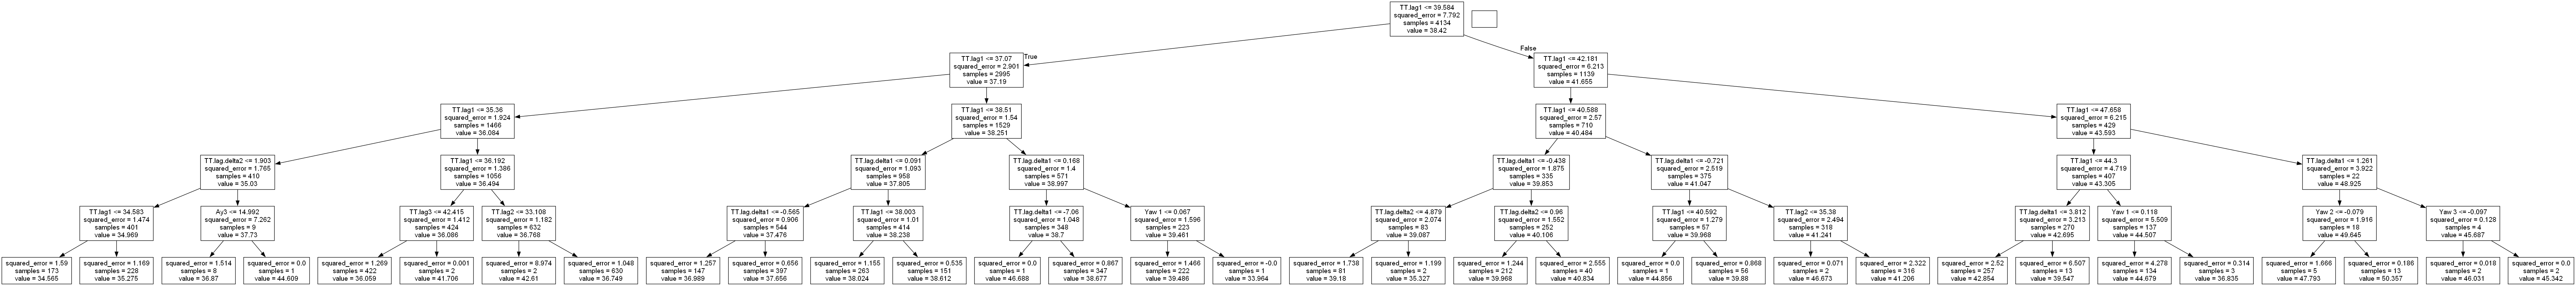

In [8]:

# Create DOT data
# dot_data = tree.export_graphviz(Tree_model, out_file=None, feature_names=Names)  
                                #class_names=iris.target_names)
dot_data = tree.export_graphviz(Tree_model, out_file=None, feature_names=Names)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png())

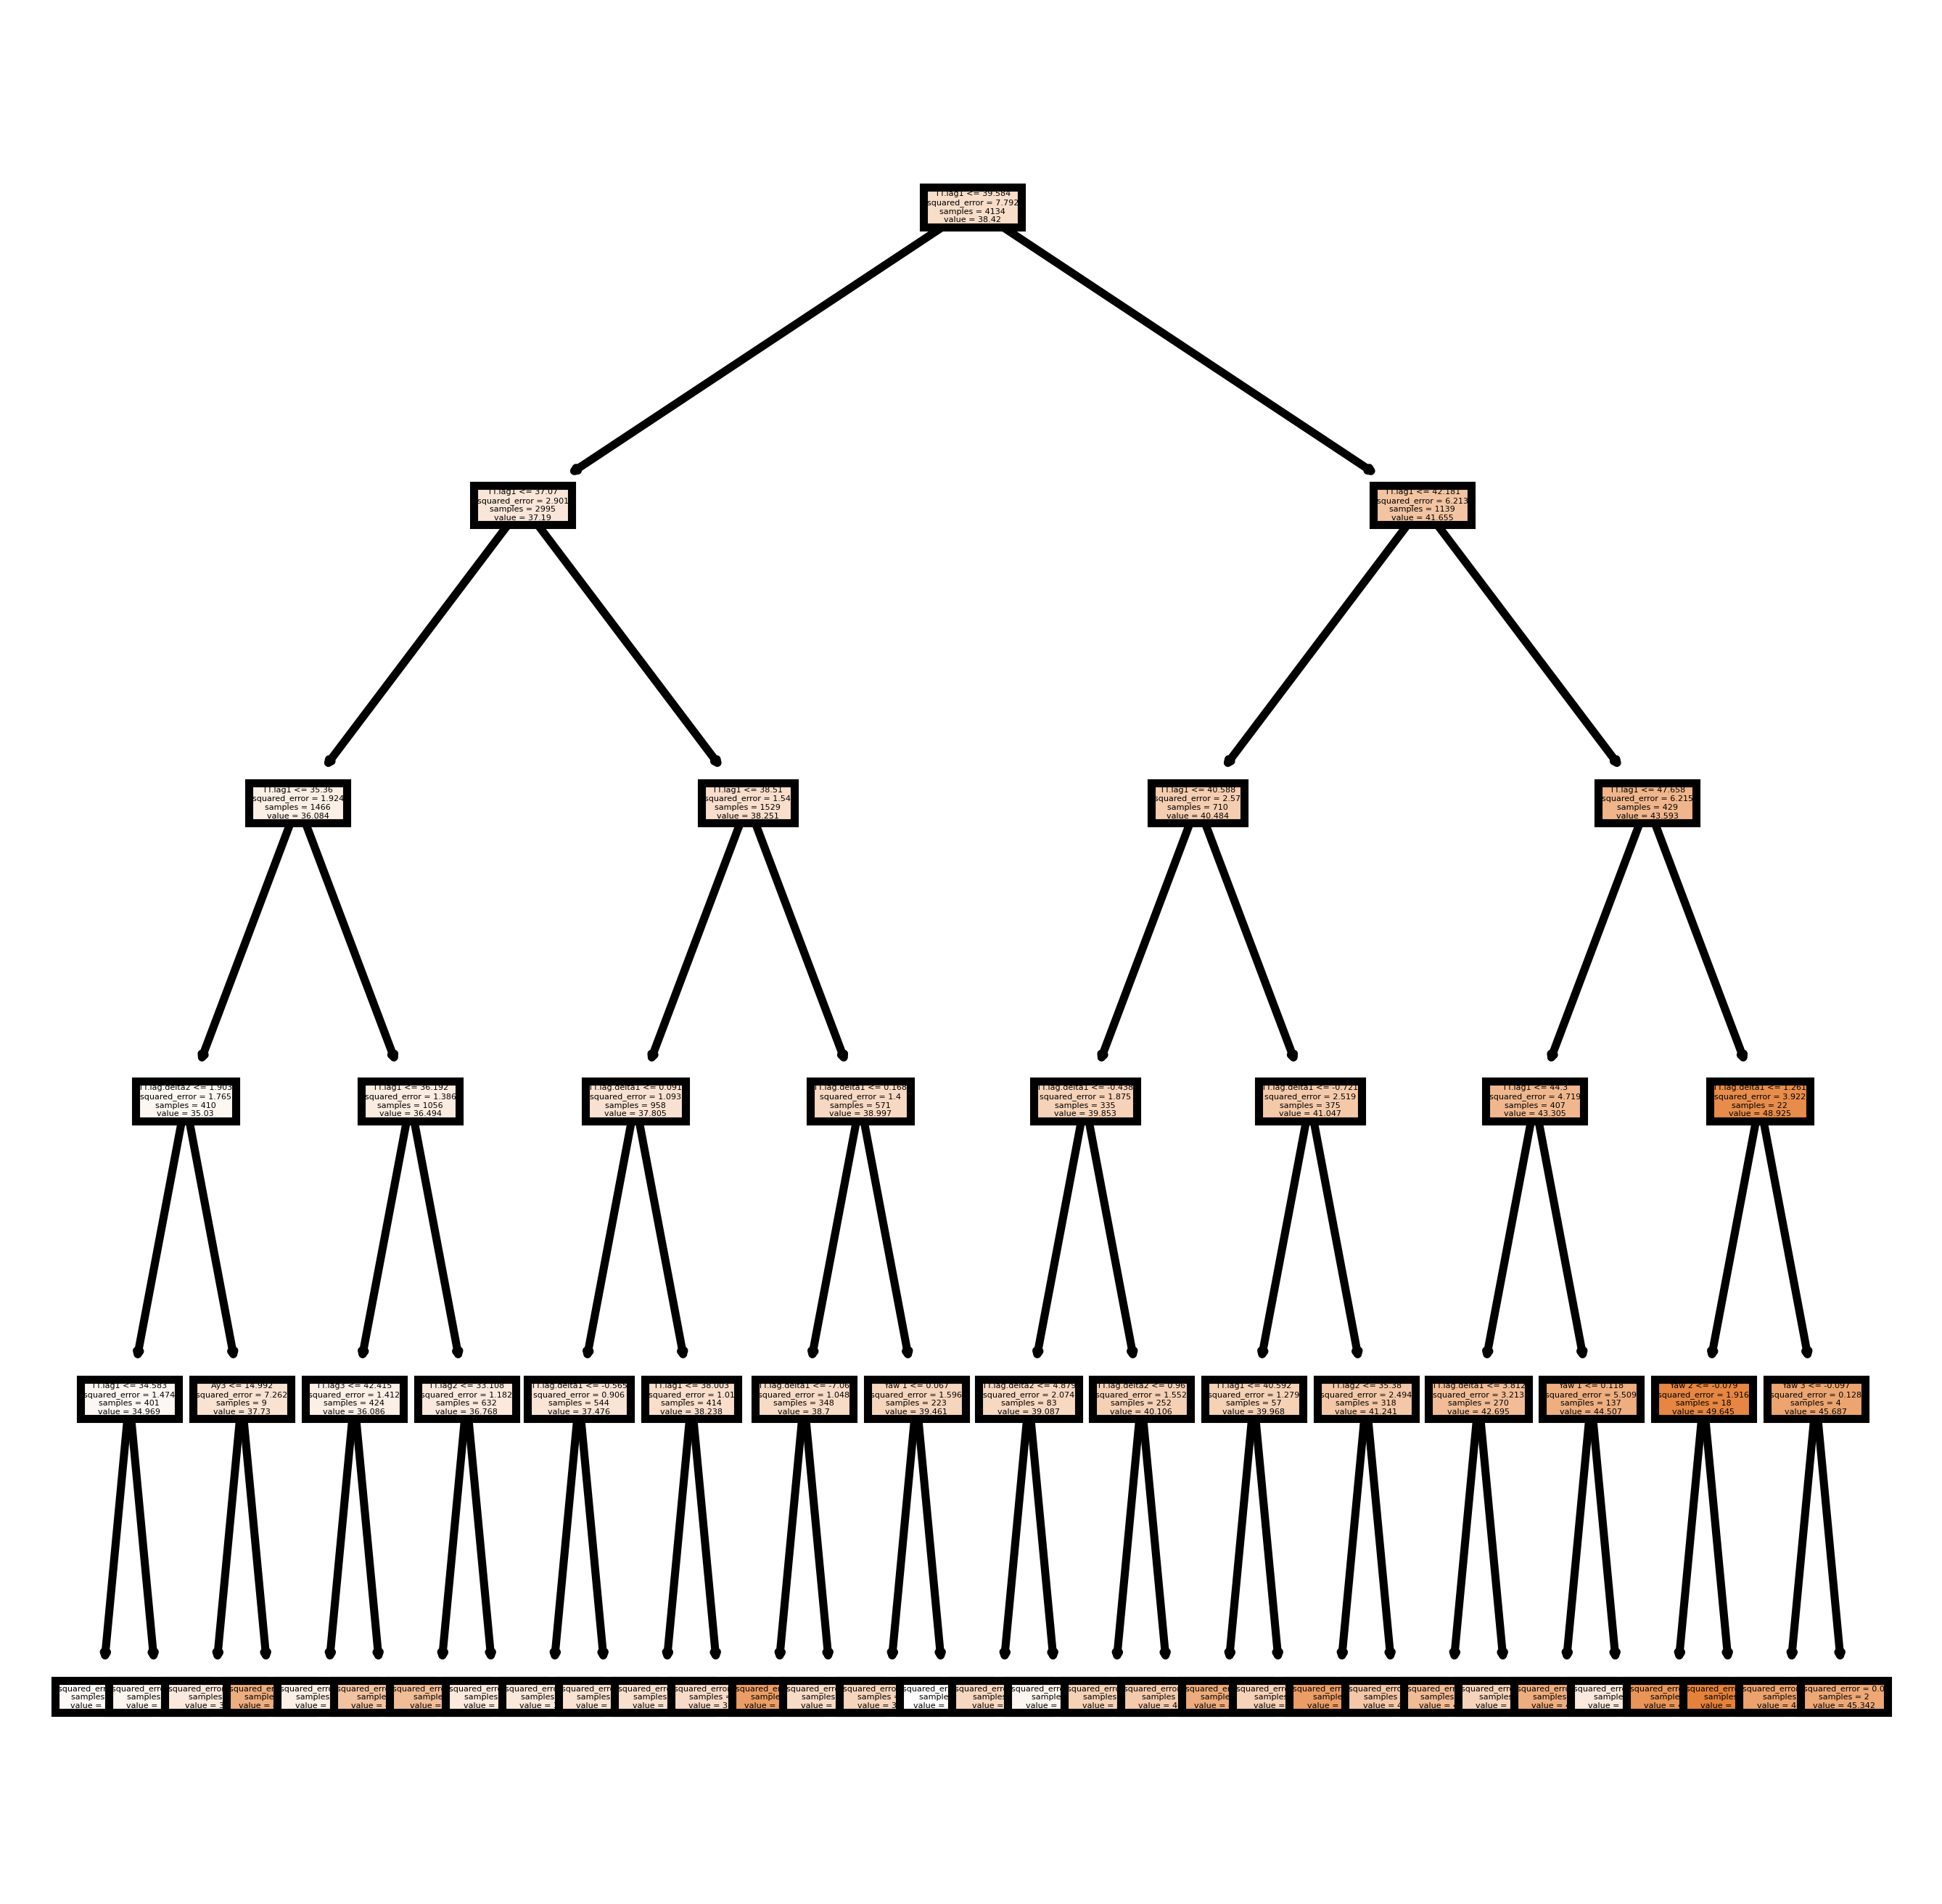

In [9]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 10})
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(Tree_model,
               feature_names = Names,
              # class_names=cn,
               filled = True)

fig.savefig('Tree_photo.jpg')